In [1]:
import os
os.chdir("../")
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] = "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)



## Extract embedding for Cross-Platform integration of v10x Mouse Adult Olfactory Bulb and Mouse Olfactory Stereo-seq

In [3]:
data_root = "./Dataset/Mouse/cross_platform"
sample_name = [
    "Mouse_Adult_Olfactory_Bulb_10x",
    "Mouse_Olfactory_Stereo-seq"
]
file_name = [
    "filtered_feature_bc_matrix.h5", 
    "filtered_feature_bc_matrix.h5ad"
]

tech_lst = ["v10x", "Stereo-seq" ]
Hist = [ True, False]
subsample = [1, 0.5]

n_clusters=7
negi = 12

## Preprocess for Cross-Platform integration of c and Mouse Olfactory Stereo-seq 
Note: this step is performed without position alignment.

In [4]:
GCAST.set_seed(random_seed)
adata, graph_dict = GCAST.LoadCrossST(data_root, sample_name, file_name, n_clusters,tech_lst,subsample, Hist, n_top_genes=6000).data()
net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device, model_path= f"{data_root}", model_name=f"crossplatform")

100%|██████████| 2/2 [00:26<00:00, 13.21s/it]


In [5]:
net.train_with_dec()

 16%|█▌        | 158/1000 [00:57<05:03,  2.77it/s]


## Extract embedding for Cross-Platform integration of v10x Mouse Adult Olfactory Bulb and Mouse Olfactory Stereo-seq  （Reproduce the results in the paper）
> **Note:**   
> (1) After loading the `adata` object and the graph using `LoadCrossST()`, you can skip the `train_with_dec()` step.   
> (2) The related data and pretrained model `CrossPlatform.pth` are available at the following link:   
> https://pan.quark.cn/s/fa511e11c294 (in fold "../Dataset/Mouse/cross_platform").   
> (3) By loading the trained weights in `CrossPlatform.pth` and setting the network to evaluation mode (`net.eval()`), you can automatically reproduce the results in the paper.

In [ ]:
# # Calling net.eval() can load "../Dataset/Mouse/cross_platform/CrossPlatform.pth"
adata.obsm["emb"] = net.eval()
adata = GCAST.hm_integration(adata, harmony_key='emb')

2026-02-18 02:29:39,236 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2026-02-18 02:29:40,856 - harmonypy - INFO - sklearn.KMeans initialization complete.
2026-02-18 02:29:40,920 - harmonypy - INFO - Iteration 1 of 10
2026-02-18 02:29:42,499 - harmonypy - INFO - Iteration 2 of 10
2026-02-18 02:29:44,124 - harmonypy - INFO - Iteration 3 of 10
2026-02-18 02:29:45,741 - harmonypy - INFO - Iteration 4 of 10
2026-02-18 02:29:46,927 - harmonypy - INFO - Iteration 5 of 10
2026-02-18 02:29:47,992 - harmonypy - INFO - Iteration 6 of 10
2026-02-18 02:29:48,854 - harmonypy - INFO - Iteration 7 of 10
2026-02-18 02:29:49,721 - harmonypy - INFO - Iteration 8 of 10
2026-02-18 02:29:50,664 - harmonypy - INFO - Iteration 9 of 10
2026-02-18 02:29:51,597 - harmonypy - INFO - Iteration 10 of 10
2026-02-18 02:29:52,311 - harmonypy - INFO - Stopped before convergence


In [7]:
GCAST.KMeans_Cluster(adata, n_clusters=n_clusters)
adata_1 = adata[adata.obs["batch"]=="0"]
adata_2 = adata[adata.obs["batch"]=="1"]
cluster_1 = GCAST.eval_cluster_number(adata_1, 7, ["KMeans"] )
cluster_2 = GCAST.eval_cluster_number(adata_2, 7, ["KMeans"] )
print("CCMS of v10x Mouse Adult Olfactory Bulb:", cluster_1)
print("CCMS of v10x Mouse Adult Olfactory Bulb:", cluster_2)

CCMS of v10x Mouse Adult Olfactory Bulb: [1.0]
CCMS of v10x Mouse Adult Olfactory Bulb: [1.0]


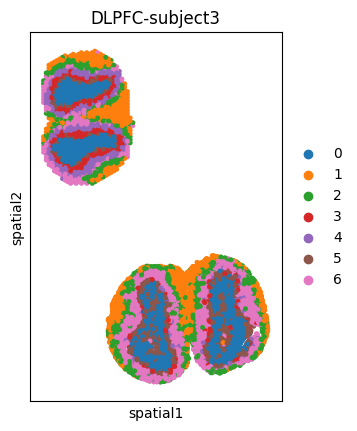

In [8]:
# GCAST.plot_spatial(adata, color="KMeans", title="Mouse-CrossPlatform",  save=False, show=True)

## Spatial visualization of of two different sequencing technology integration  
**Note**: You can skip `train_with_dec()` and directly obtain the post-training, coordinate-aligned spatial transcriptomics data from the provided link https://pan.quark.cn/s/fa511e11c294 for convenient visualization, as the downstream post-processing procedures are relatively complex.

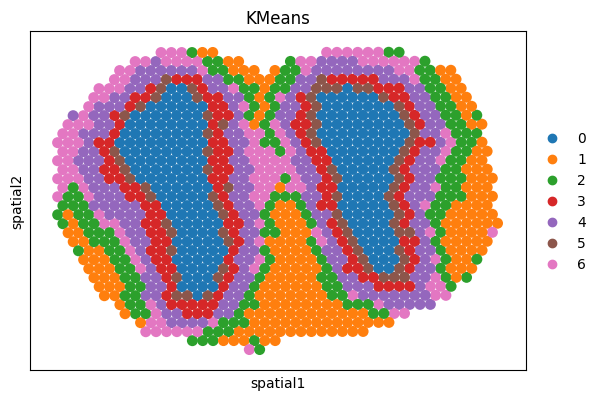

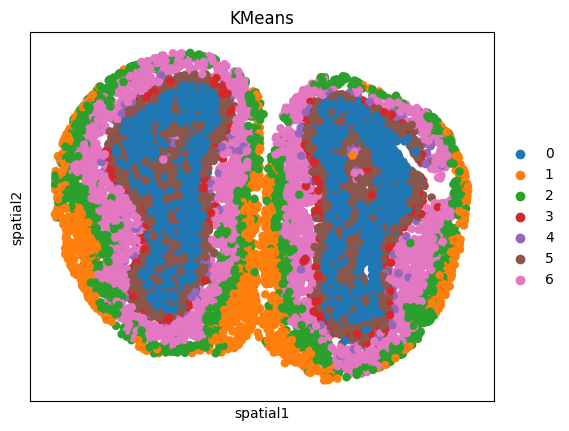

In [9]:
import anndata
import scanpy as sc 
import matplotlib.pyplot as plt
adata_processed = anndata.read_h5ad("./Dataset/Mouse/cross_platform/adata_crossplafform.h5ad")                                
batch_names = adata_processed.obs['batch_name'].unique()

for batch in batch_names:
    adata_batch = adata_processed[adata_processed.obs['batch_name'] == batch]
    if batch == "Mouse_Adult_Olfactory_Bulb_10x":
        batch_name = "Mouse Adult Olfactory(10x Visium)"
    elif batch == "Mouse_Olfactory_Stereo-seq":
        batch_name = "Mouse Adult Olfactory(Stereo-seq)"
    fig = sc.pl.spatial(
        adata_batch,
        color='KMeans',
        spot_size=120,
        return_fig=True  # 返回matplotlib的fig对象
    )
    # 设置标题字体大小
    fig.axes[0].set_title(f'{ batch} ', fontsize=20)


    plt.show()
    plt.close(fig)